# Solar Position


Solar position is a fundamental aspect of solar resource assessment. The different angles used in the reference system to locate the sun at a particular time and location are probably the most common input in solar resource modelling and assessment.

In this section, we cover: <br>
- Solar position system; <br>
- Solar position algorithms; and <br>
- Applications of solar position. <br>

***
<div style="text-align: right"> <i>Content by Jesus Polo & Javier Lopez Lorente</i> </div>

## Solar position system

The reference solar position system used for solar systems is usually a horizontal coordinate system focused on the observer. In this system, any observed placed at a given latitude and longitude is completeley determined by the zenith ($\theta$) and azimuth angles $\phi$ (see Figure). The solar elevation angle ($\alpha$) is the complementary of the zenith solar angle ($\alpha$ = 90 - $\theta$).


```{image} ../notebooks/graphics/solar_position_system.png
:alt: decomposition_flowchart
:class: bg-white mb-1
:width: 500px
:align: center
```


In Python, the solar position angles can be easily calculated at any site using the solar position algorithm (SPA) of *pvlib*, which has implemented by default with NREL's SPA algorithm (Reda and Andreas, 2003). We will show and compare the different solar position algorithms available in *pvlib* and show how solar position angles can be estimated in several ways.

Let's import the required libraries and see an example: 


In [1]:
# Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pvlib
from pvlib.location import Location

A way to estimate the solar position is through the object *pvlib.location.Location* in the library *[pvlib](https://pvlib-python.readthedocs.io/en/stable/index.html)*, which helps defining its particular geographic location (e.g., latitude, longitude, timezone, and altitude).

In [2]:
# Definition of Location oject. Coordinates and elevation of Madrid Ciemat Headquarters (Spain)
site = Location(40.456, -3.73, 'Etc/GMT+1', 651, 'Ciemat (Madrid, ES)') # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range('2018-01-01 00:00:00', '2018-12-31 23:59:00', closed='left', freq='H', tz=site.tz)

# Estimate Solar Position with the 'Location' object
solpos = site.get_solarposition(times)

# Visualize the resulting DataFrame
solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2018-01-01 00:00:00-01:00,160.468395,160.468395,-70.468395,-70.468395,29.900075,-3.346090
2018-01-01 01:00:00-01:00,152.396698,152.396698,-62.396698,-62.396698,58.528284,-3.365720
2018-01-01 02:00:00-01:00,141.889229,141.889229,-51.889229,-51.889229,75.239601,-3.385340
2018-01-01 03:00:00-01:00,130.627975,130.627975,-40.627975,-40.627975,86.856662,-3.404951
2018-01-01 04:00:00-01:00,119.234764,119.234764,-29.234764,-29.234764,96.389095,-3.424553


Alternatively, the function *pvlib.solarposition.get_solarposition()* can be used to obtain the same result:

In [3]:
# Alternative method using the 'solarposition.get_solarposition' function
solpos = pvlib.solarposition.get_solarposition(times, site.latitude, site.longitude, site.altitude)

solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2018-01-01 00:00:00-01:00,160.468395,160.468395,-70.468395,-70.468395,29.900075,-3.346090
2018-01-01 01:00:00-01:00,152.396698,152.396698,-62.396698,-62.396698,58.528284,-3.365720
2018-01-01 02:00:00-01:00,141.889229,141.889229,-51.889229,-51.889229,75.239601,-3.385340
2018-01-01 03:00:00-01:00,130.627975,130.627975,-40.627975,-40.627975,86.856662,-3.404951
2018-01-01 04:00:00-01:00,119.234764,119.234764,-29.234764,-29.234764,96.389095,-3.424553


We observe that both lines of code return the same output. After the solar angles are estimated, these can be visualized:

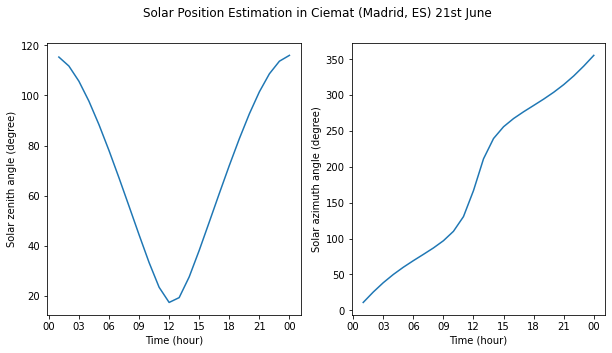

In [4]:
import matplotlib.dates as mdates

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Solar Position Estimation in ' + site.name + ' 21st June')

# plot for solar zenith angle
ax1.plot(solpos.loc['2018-06-21'].zenith)
ax1.set_ylabel('Solar zenith angle (degree)')
ax1.set_xlabel('Time (hour)')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# plot for solar azimuth angle
ax2.plot(solpos.loc['2018-06-21'].azimuth)
ax2.set_ylabel('Solar azimuth angle (degree)')
ax2.set_xlabel('Time (hour)')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

## Solar position algorithms

In the example above, we used the default SPA available in *pvlib*. However, there are several algorithms for estimating the solar position implemented in *pvlib*. You can use your preferred algorithm by defining the argument *method* when calling the function [*get_solarposition()*](https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.solarposition.get_solarposition.html). The 5 avaiable SPAs are:

- nrel_numpy: based on NREL SPA method where pvlib uses the function 'spa_python()'.
- nrel_numba: simular to 'nrel_numpy', but the code is compiled first.
- pyephem: based on the [PyEphem package](https://rhodesmill.org/pyephem/), pvlib uses the function 'pyephem()'.
- ephemeris: based on the pvlib ephemeris code, uses the function 'ephemeris()'.
- nrel_c: based on NREL SPA code in C language: spa_c()

There are other solar position algorithms available in the literature, for example, the Solar Geometry 2 (SG2) model (Blanc and Wald, 2012), which is available in [Matlab and C language](https://www.oie.minesparis.psl.eu/Valorisation/Outils/Solar-Geometry/).

Below, we will compare some of these methods, namely: NREL SPA ('nrel_numpy'), PyEphem ('pyephem') and Ephemeris ('ephemeris').

In [5]:
# Estimate the solar position with a specific SPA defined with the argument 'method' 
solpos_nrel = pvlib.solarposition.get_solarposition(times, site.latitude, site.longitude, site.altitude, method='nrel_numpy')
solpos_pyephem = pvlib.solarposition.get_solarposition(times, site.latitude, site.longitude, site.altitude, method='pyephem')
solpos_ephemeris = pvlib.solarposition.get_solarposition(times, site.latitude, site.longitude, site.altitude, method='ephemeris')

We can visualize the differences in the estimations of the **solar zenith angle**:

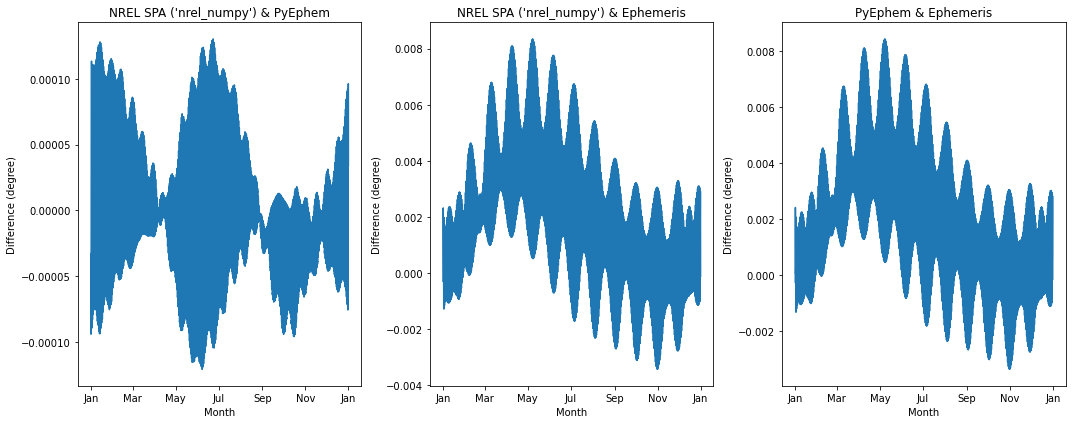

In [6]:
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

# Wrap the axes
axs = axs.ravel()

# Plot
axs[0].plot(solpos_nrel['zenith']-solpos_pyephem['zenith'])
axs[1].plot(solpos_nrel['zenith']-solpos_ephemeris['zenith'])
axs[2].plot(solpos_pyephem['zenith']-solpos_ephemeris['zenith'])

# Add characteristics to each subplot in a loop
plots = ["NREL SPA ('nrel_numpy') & PyEphem", "NREL SPA ('nrel_numpy') & Ephemeris", "PyEphem & Ephemeris"]
for i in range(3):
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Difference (degree)')
    axs[i].set_title(plots[i])
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()


We can visualize the differences in the estimations of the **solar azimuth angle**:

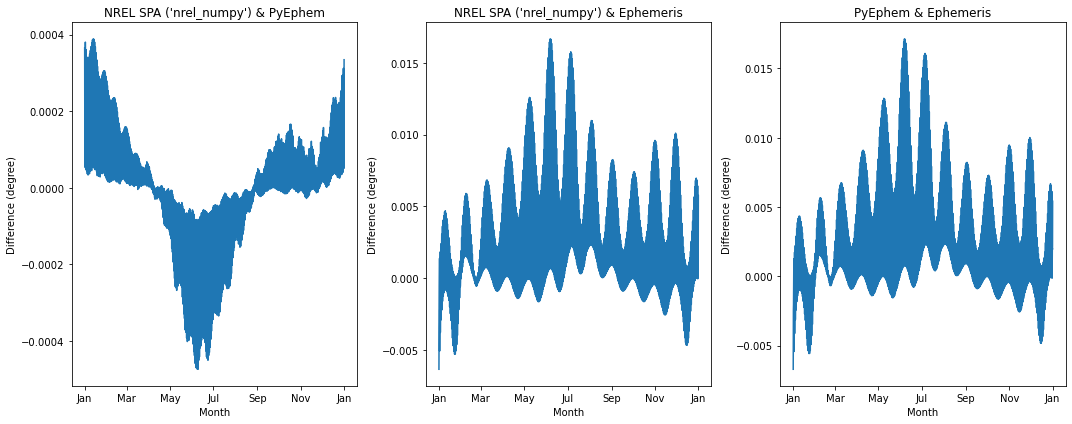

In [7]:
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

# Wrap the axes
axs = axs.ravel()

# Plot
axs[0].plot(solpos_nrel['azimuth']-solpos_pyephem['azimuth'])
axs[1].plot(solpos_nrel['azimuth']-solpos_ephemeris['azimuth'])
axs[2].plot(solpos_pyephem['azimuth']-solpos_ephemeris['azimuth'])

# Add characteristics to each subplot in a loop
plots = ["NREL SPA ('nrel_numpy') & PyEphem", "NREL SPA ('nrel_numpy') & Ephemeris", "PyEphem & Ephemeris"]
for i in range(3):
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Difference (degree)')
    axs[i].set_title(plots[i])
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()


The absolute differences between methods can then be computed:

In [8]:
# compute the absolute difference in Solar Zenith Angle between SPA methods
nrel_pyephem = np.abs(solpos_nrel['zenith']-solpos_pyephem['zenith']).max()
nrel_ephemeris = np.abs(solpos_nrel['zenith']-solpos_ephemeris['zenith']).max()
pyephem_ephemeris = np.abs(solpos_pyephem['zenith']-solpos_ephemeris['zenith']).max()

# list of variables 
spa_methods_sza = [nrel_pyephem, nrel_ephemeris, pyephem_ephemeris] # Solar Zenith Angle

# compute the absolute difference in Solar Zenith Angle between SPA methods
nrel_pyephem = np.abs(solpos_nrel['azimuth']-solpos_pyephem['azimuth']).max()
nrel_ephemeris = np.abs(solpos_nrel['azimuth']-solpos_ephemeris['azimuth']).max()
pyephem_ephemeris = np.abs(solpos_pyephem['azimuth']-solpos_ephemeris['azimuth']).max()

# list of variables 
spa_methods_azi = [nrel_pyephem, nrel_ephemeris, pyephem_ephemeris] # Solar Azimuth Angle

spa_names = ['NREL & PyEphem','NREL & Ephemeris','PyEphem & Ephemeris']

print("Absolute differences between solar position algorithms:\n" + "-"*55)
print("Solar Zenith Angle")
for i in range(len(spa_names)):
    print("-", spa_names[i], ": {:.5f}".format(spa_methods_sza[i]))

print("\nSolar Azimuth Angle")
for i in range(len(spa_names)):
    print("-", spa_names[i], ": {:.5f}".format(spa_methods_azi[i]))

Absolute differences between solar position algorithms:
-------------------------------------------------------
Solar Zenith Angle
- NREL & PyEphem : 0.00013
- NREL & Ephemeris : 0.00835
- PyEphem & Ephemeris : 0.00843

Solar Azimuth Angle
- NREL & PyEphem : 0.00047
- NREL & Ephemeris : 0.01666
- PyEphem & Ephemeris : 0.01713


We observe that the differences among methods are small in the range of 0.01 degree.

## Applications of solar position

The use of solar position algorithms in solar resource can have several direct applications. For example, the visualization of sun path diagrams or the estimation of sunrise, sunset and solar transit time. 


### The solar analemma

One of the applications of solar position can creating the solar analemman. An analemma is a diagram showing the position of the Sun in the sky as seen from a fixed location on Earth at the same mean solar time. In Python, we could implement the analemma as follows:

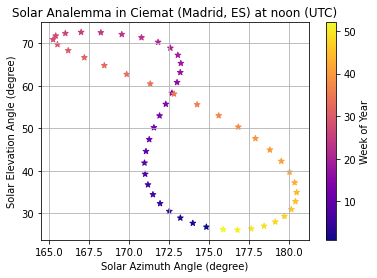

In [9]:
# Definition of a times (noon)
times = pd.date_range('2020-01-01 12:00:00', '2021-01-01 12:00:00', closed='left', freq='W', tz='UTC')
# Solar Position Estimation for the object 'site' (CIEMAT, Madrid (Spain))
solpos = site.get_solarposition(times)

# Plotting the Analemma
plt.scatter(solpos['azimuth'], solpos['apparent_elevation'], marker="*", c=times.isocalendar().week, cmap='plasma')
cbar = plt.colorbar()
cbar.set_label('Week of Year')
plt.xlabel('Solar Azimuth Angle (degree)')
plt.ylabel('Solar Elevation Angle (degree)')
plt.title('Solar Analemma in ' + site.name + ' at noon (UTC)')
plt.grid()
plt.show()

**Sun path diagrams throughout the day** are another application of the solar angles. There are some well documented examples availabe for [sun path diagrams](https://pvlib-python.readthedocs.io/en/stable/auto_examples/plot_sunpath_diagrams.html) in the documentation of *pvlib*.

### Other applications

Solar position angles can also be used to estimate the **sunrise, sunset and solar transit time**. *pvlib* has specific functions to estimate these times with different methods: [NREL's SPA](https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.solarposition.sun_rise_set_transit_spa.html), [PyEphem package](https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.solarposition.sun_rise_set_transit_ephem.html) and [geometric calculation](https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.solarposition.sun_rise_set_transit_geometric.html). 

The **Equation of Time** can also be estimated using the available *pvlib* functions related to solar position. In fact, it is one of the available outputs when using the NREL's SPA method. The equation of time is the difference apparent solar time minus mean solar time. In other words, if the sun is ahead of the clock the sign is positive, and if the clock is ahead of the sun the sign is negative. Let's see how the equation of time looks:


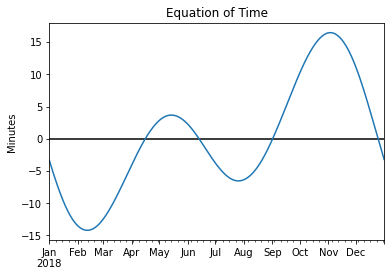

In [10]:
fig, ax1 = plt.subplots()
ax1 = solpos_nrel['equation_of_time'].plot(zorder=2)
ax1.hlines(0, solpos_nrel.index[0], solpos_nrel.index[-1], color='black', zorder=1)
ax1.set_ylabel('Minutes')
plt.title('Equation of Time')
plt.show()

## Summary

This section has introduced the basics of solar position and how to estimate in Python the characteristic angles used in solar energy applications. Particularly, the following examples have been covered: <br>
- The estimation of solar angles using function-based and object-oriented code. <br>
- The estimation solar angles attending to several solar position algorithms currently available in *pvlib*. Comparison of the methods: NREL SPA, PyEphem and Ephemeris. <br>
- Several applications in the use of solar angles (e.g., solar analemma) have been shown.

Solar angles are typically used as input to multiple solar resource modelling techniques and you will find in other sections of AssessingSolar.org. 


***

## References

Blanc, P.; Wald, L. (2012). The SG2 algorithm for a fast and accurate computation of the position of the Sun for multi-decadal time period. Solar Energy, Elsevier, 88 (10), pp. 3072-3083. doi:[10.1016/j.solener.2012.07.018](https://www.sciencedirect.com/science/article/pii/S0038092X12002800)

Reda, I.; Andreas, A. (2003). Solar Position Algorithm for Solar Radiation Applications. 55 pp.; NREL Report No. TP-560-34302, Revised January 2008. https://www.nrel.gov/docs/fy08osti/34302.pdf

Rhodes B. C. (2011). PyEphem: Astronomical Ephemeris for Python
(ascl:1112.014) https://ui.adsabs.harvard.edu/abs/2011ascl.soft12014R